## How well does a sample of 17 data points represent variability behavior in a source?

Trying to mimic the situation we have for RZ2109, I create a variable source on short time scales, then sample 17 arbitrary points as observations and check how consistent the two are in terms of slope. In this case, I use Pearson R, assume source behavior is dominated by red noise and 17 "observations" are entirely random.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from stingray.simulator.simulator import Simulator

In [2]:
%matplotlib notebook

random seed:3765548881


<IPython.core.display.Javascript object>


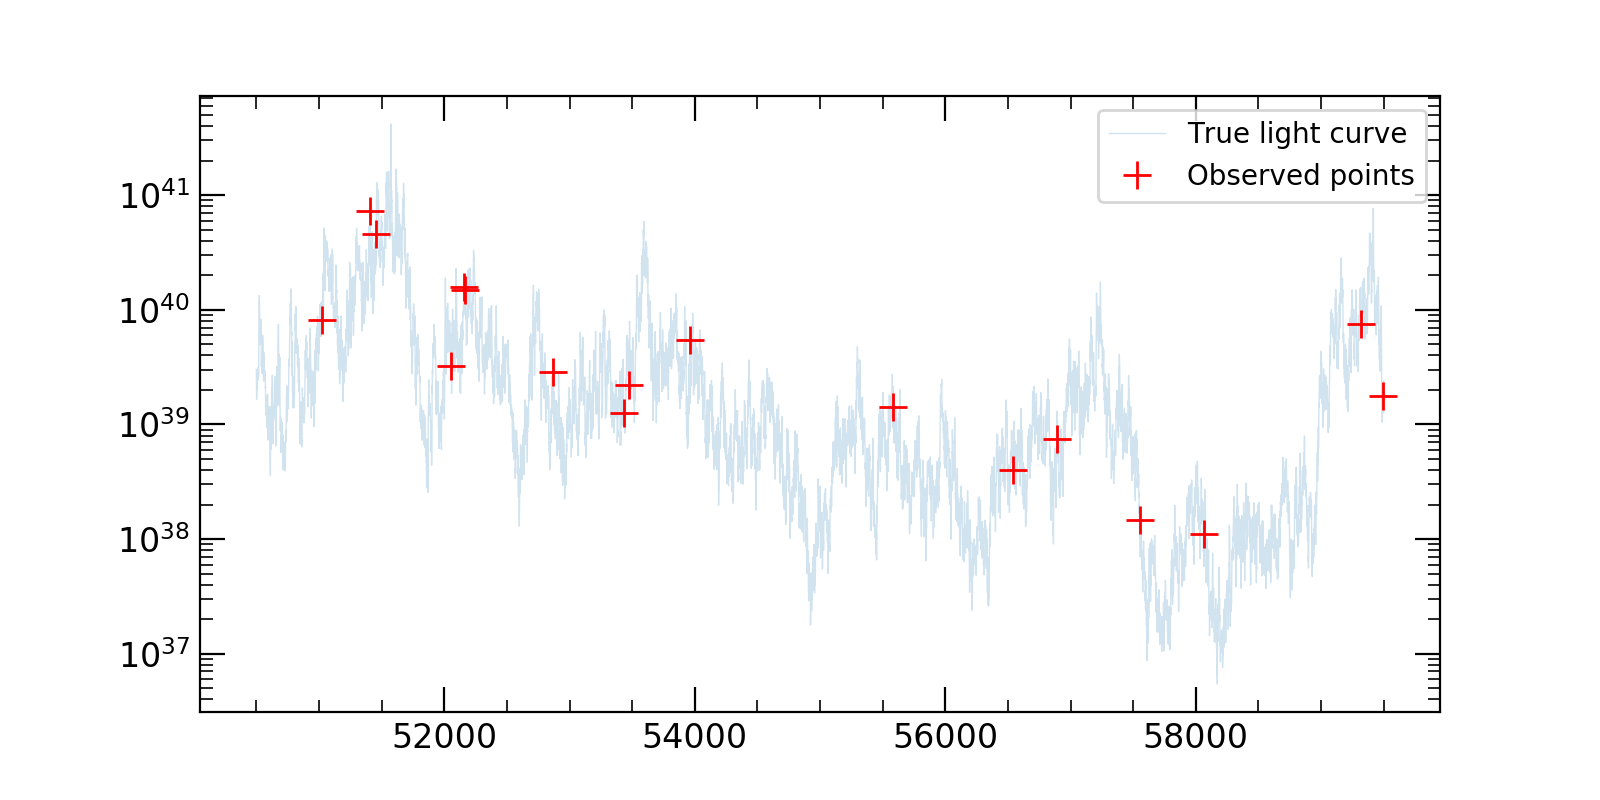

pearson r for obs: -0.49212184654702684
pearson r for all: -0.2768933413306755


/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)


In [12]:
seed = np.random.randint(2**32-1)
print(f'random seed:{seed}')
np.random.seed(seed)
plt.figure(figsize=(8,4))
sim = Simulator(dt=1, tstart=50500, N=9000, mean=1,red_noise=1, rms=0.8)
time_all = sim.time
lum_all = 10**(38+sim.simulate('smoothbknpo', [.6, 1.5, 2.0, 4]).counts)

obs_index = np.random.randint(0,high=len(time_all),size=17)
time_obs = time_all[obs_index]
lum_obs = lum_all[obs_index]

print(f'pearson r for obs: {pearsonr(time_obs,lum_obs)[0]}')
print(f'pearson r for all: {pearsonr(time_all,lum_all)[0]}')

plt.plot(time_all,lum_all,'-',lw=0.5,alpha=0.2,label='True light curve')
plt.plot(time_obs,lum_obs,'+r',ms=10, label='Observed points')
plt.legend()
plt.yscale('log')
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right=True,top=True)
plt.savefig('rednoise.jpg',bbox_inches='tight',dpi=300)

This is an example of what I'm simulating. Now, doing it for a large sample:

In [13]:
p_obs = []
p_all = []
sim = Simulator(dt=1, tstart=50500, N=9000, mean=1,red_noise=1, rms=0.8);

for i in range(10000):
    time_all = sim.time
    lum_all = 10**(38+sim.simulate(1.5).counts)

    obs_index = np.random.randint(0,high=len(time_all),size=17)
    time_obs = time_all[obs_index]
    lum_obs = lum_all[obs_index]

    p_obs.append(pearsonr(time_obs,lum_obs)[0])
    p_all.append(pearsonr(time_all,lum_all)[0])

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

In [19]:
p_obs2 = []
p_all2 = []
sim = Simulator(dt=1, tstart=50500, N=9000, mean=1,red_noise=1, rms=0.8);

for i in range(10000):
    time_all = sim.time
    lum_all = 10**(38+sim.simulate(1.5).counts)

    obs_index = np.random.randint(0,high=len(time_all),size=50)
    time_obs = time_all[obs_index]
    lum_obs = lum_all[obs_index]

    p_obs2.append(pearsonr(time_obs,lum_obs)[0])
    p_all2.append(pearsonr(time_all,lum_all)[0])

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors to zero. Sorry for the inconvenience.
  warnings.warn("SIMON says: {0}".format(message), **kwargs)
/home/arash/anaconda3/lib/python3.6/site-packages/stingray/utils.py:103: UserWarning: SIMON says: Stingray only uses poisson err_dist at the moment, We are setting your errors

<IPython.core.display.Javascript object>


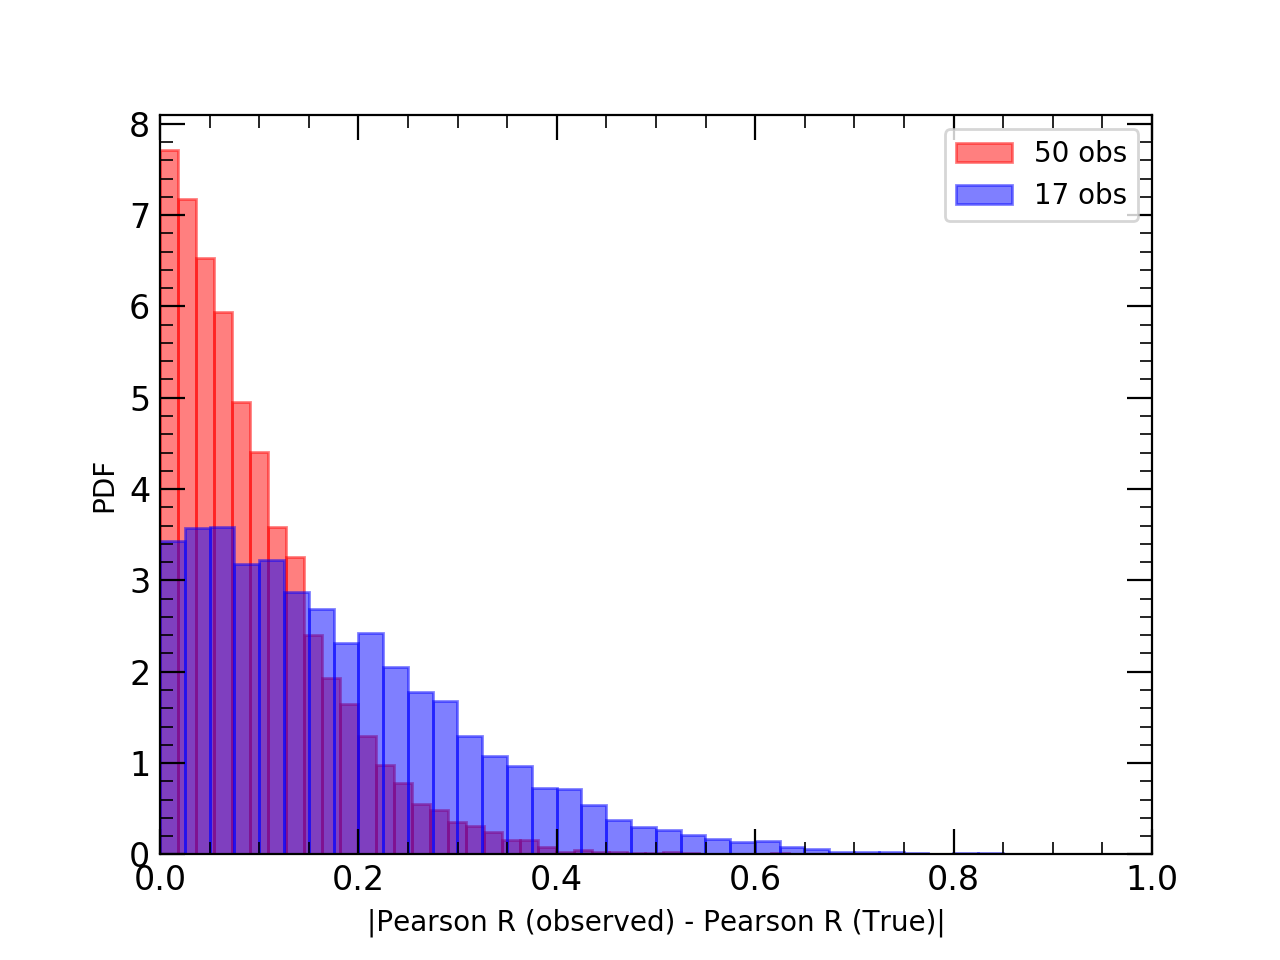

In [27]:
plt.figure()
#plt.hist(p_all,edgecolor='b',bins=40,color='blue',alpha=0.7)
#plt.hist(p_obs,alpha=0.5,edgecolor='r',bins=40,color='red')Discrepancy between Pearson from 17 random points vs. "true" data
plt.hist(abs(np.array(p_all2)-np.array(p_obs2)),bins=40,density=True,color='r',edgecolor='r',alpha=0.5,label='50 obs')
plt.hist(abs(np.array(p_all)-np.array(p_obs)),bins=40,density=True,color='b',edgecolor='b',alpha=0.5,label='17 obs')
plt.xlim(0,1)
plt.legend()
plt.ylabel('PDF')
plt.xlabel('|Pearson R (observed) - Pearson R (True)|')
plt.minorticks_on()
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tick_params(axis='both', which='major', length=9)
plt.tick_params(axis='both', which='minor', length=4.5)
plt.tick_params(axis='both', which='both',direction='in',right=True,top=True)

In [29]:
dist = abs(np.array(p_all)-np.array(p_obs))
len(dist[dist>0.2])/len(dist)

0.3787

In [30]:
dist2 = abs(np.array(p_all2)-np.array(p_obs2))
len(dist2[dist2>0.2])/len(dist2)

0.1017